<style>
.wzor {
  /* width: auto; */
  /* padding: auto; */
  border: 0.5rem solid gray;
  /* margin: 0; */
  background-color: lightgray;
}
</style>


# Modele analizy danych

Tomasz Rodak

---

## Literatura
   1. James, G., Witten, D., Hastie, T., Tibshirani, R., & Taylor,
      J. (2023). An Introduction to Statistical Learning: With
      Applications in Python.
      
      [ISLP](https://www.statlearning.com/)
   
   2. Bishop, C. M., & Nasrabadi, N. M. (2006). Pattern recognition and
      machine learning (Vol. 4, No. 4, p. 738). New York: springer. 
   
      [PRML](https://www.microsoft.com/en-us/research/people/cmbishop/prml-book/)
   
   3. Kroese, D. P., Botev, Z., Taimre, T., & Vaisman, R. (2019). Data
      science and machine learning: mathematical and statistical
      methods. CRC Press.
   
      [https://people.smp.uq.edu.au/DirkKroese/DSML/](https://people.smp.uq.edu.au/DirkKroese/DSML/)
   
   4. Hastie, T., Tibshirani, R., Friedman, J. H., & Friedman,
      J. H. (2009). The elements of statistical learning: data mining,
      inference, and prediction (Vol. 2, pp. 1-758). New York:
      springer.
   
      [https://hastie.su.domains/ElemStatLearn/](https://hastie.su.domains/ElemStatLearn/)
   
   5. Murphy, K. P. (2022). Probabilistic machine learning: an
      introduction. MIT press.
   
      [https://probml.github.io/pml-book/book1.html](https://probml.github.io/pml-book/book1.html)
   
   6. Murphy, K. P. (2023). Probabilistic machine learning: Advanced
      topics. MIT press.
   
      [https://probml.github.io/pml-book/book2.html](https://probml.github.io/pml-book/book2.html)
   
   7. Bishop, C. M., & Bishop, H (2024). Deep learning. Springer.
   
      [https://www.bishopbook.com/](https://www.bishopbook.com/)
   
   8. Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep learning. MIT press.
   
      [https://www.deeplearningbook.org/](https://www.deeplearningbook.org/)

---

## Wykład II

ISLP, rozdz. 3.1

---

## Spis treści

1. Regresja liniowa
2. Regresja liniowa z jedną zmienną niezależną
    - Szacowanie parametrów modelu metodą najmniejszych kwadratów
    - Ocena jakości oszacowania parametrów modelu
        - $p$-wartość testu (*p-value*)
        - Rozkład statystyki $t$
    - Ocena dokładności modelu
        - Statystyka $R^2$

## 1. Regresja liniowa

Zbiór danych `advertising` pochodzi ISLP i zawiera informacje dotyczące wydatków na reklamę oraz wyników sprzedaży produktu w 200 różnych miastach. Dane obejmują następujące zmienne:

- **TV** – budżet reklamowy przeznaczony na telewizję (w tysiącach dolarów)
- **radio** – budżet reklamowy przeznaczony na radio (w tysiącach dolarów)
- **newspaper** – budżet reklamowy przeznaczony na prasę (w tysiącach dolarów)
- **sales** – wyniki sprzedaży produktu (w tysiącach jednostek)

Celem analizy jest zbadanie zależności pomiędzy wydatkami na reklamę w poszczególnych mediach a wielkością sprzedaży. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

advertising = pd.read_csv('datasets/Advertising.csv', usecols=[1, 2, 3, 4])
advertising.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


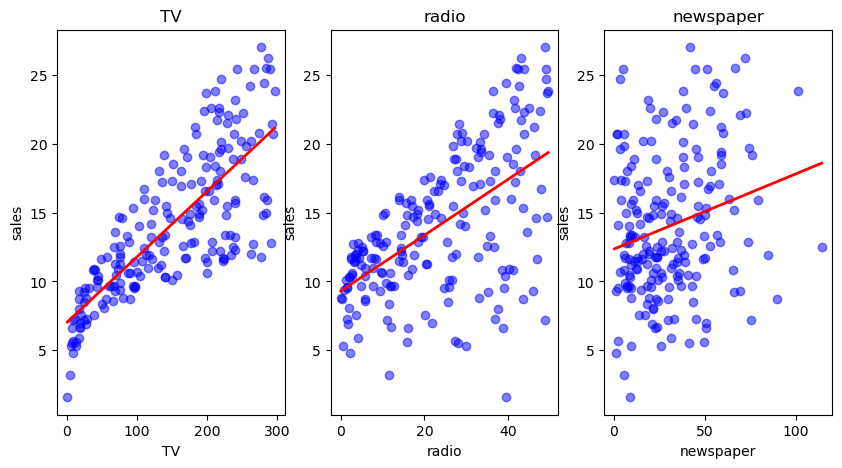

In [2]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5))
for ax, col in zip([ax1, ax2, ax3], 'TV radio newspaper'.split()):
    sns.regplot(x=col, y='sales', data=advertising, ax=ax, ci=None,
                line_kws={'color': 'red', 'lw': 2},
                scatter_kws={'color': 'blue', 'alpha': 0.5})
    ax.set_title(col)

Stawiamy pytania:

1. **Czy istnieje związek między budżetem kampanii reklamowej a wynikami sprzedaży?** Jeśli nie, to być może robienie kampanii reklamowej nie ma sensu.
2. **Jeśli związek występuje, to jak mocny?** Czy informacja o budżecie kampanii przekłada się na wiedzę na temat sprzedaży? Czy zwiększenie budżetu reklamowego zwiększa sprzedaż z dużym prawdopodobieństwem?
3. **Jak wygląda indywidualny wpływ budżetu reklamowego w każdym z mediów na wyniki sprzedaży?** Jak oddzielić ten wpływ od wpływu innych czynników?
4. **Jak silny jest związek między danym medium a wynikami sprzedaży?** O ile wzrośnie sprzedaż, jeśli zwiększymy budżet reklamowy w danym medium o jednostkę?
5. **Jaka jest predykcja wysokości sprzedaży i jaka jest niepewność tej predykcji?** 
6. **Czy relacja między budżetem reklamowym a wynikami sprzedaży jest liniowa?**
7. **Czy istnieją oddziaływania (synergia) między wpływami budżetów reklamowych w różnych mediach na wyniki sprzedaży?** Lepiej inwestować dany budżet w jedno medium czy rozłożyć go na kilka? I jeśli tak, to w jakich proporcjach?

## 2. Regresja liniowa z jedną zmienną niezależną

Dla jednej zmiennej niezależnej $X$ i jednej zmiennej zależnej $Y$, model regresji liniowej ma postać:

\begin{equation*}
Y = \beta_0 + \beta_1 X + \varepsilon,
\end{equation*}

gdzie $\varepsilon$ jest błędem losowym, czyli zmienną losową niezależną od $X$ o średniej zero.

Mniej formalnie, $Y$ jest w przybliżeniu modelowane przez $\beta_0 + \beta_1 X$:

\begin{equation*}
Y \approx \beta_0 + \beta_1 X.
\end{equation*}

Na przykład regresja liniowa nakładów reklamowych w telewizji $\text{TV}$ na wyniki sprzedaży $\text{sales}$ ma postać:

\begin{equation*}
\text{sales} \approx \beta_0 + \beta_1\cdot \text{TV}.
\end{equation*} 

Współczynniki $\beta_0$ i $\beta_1$ są parametrami modelu:

* $\beta_0$ to punkt przecięcia prostej regresji z osią $Y$ (tzw. *intercept*),
* $\beta_1$ to współczynnik kierunkowy prostej regresji (tzw. *slope*).

Współczynniki te są nieznane. Ich wartości oszacowane na podstawie danych oznaczamy $\hat{\beta}_0$ i $\hat{\beta}_1$. Wówczas przewidywane wyniki sprzedaży mają postać:

\begin{equation*}
\widehat{\text{sales}} = \hat{\beta}_0 + \hat{\beta}_1\cdot \text{TV}.
\end{equation*}

### 2.1. Szacowanie parametrów modelu metodą najmniejszych kwadratów

Dane treningowe mają postać ciągu $n$ par $(x_i, y_i)$, $i=1,\ldots,n$. 

Niech $\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i$ będzie $i$-tą wartością przewidywaną przez model. Wówczas liczbę $e_i = y_i - \hat{y}_i$ nazywamy $i$-tą *resztą*. Można udowodnić, że istnieje dokładnie jedna para $(\hat{\beta}_0, \hat{\beta}_1)$, dla której suma kwadratów reszt


<div class="wzor">

\begin{equation*}
\text{RSS} := \sum_{i=1}^n e_i^2 = \sum_{i=1}^n (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i)^2
\end{equation*}

</div>


jest najmniejsza. Wzory na $\hat{\beta}_0$ i $\hat{\beta}_1$ mają postać:

\begin{equation*}
\begin{split}
\hat{\beta}_1 &= \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2},\\
\hat{\beta}_0 &= \bar{y} - \hat{\beta}_1 \bar{x},
\end{split}
\end{equation*}

gdzie 

\begin{equation*}
\bar{x} = \frac{1}{n}\sum_{i=1}^n x_i,\qquad
\bar{y} = \frac{1}{n}\sum_{i=1}^n y_i
\end{equation*}

oznaczają wartości średnie z próby.

Współczynniki regresji `TV` względem `sales` obliczone przez klasę `LinearRegression` z modułu `sklearn.linear_model`:

In [3]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(advertising[['TV']], advertising['sales'])
model.coef_, model.intercept_

(array([0.04753664]), np.float64(7.032593549127695))

Te same współczynniki ręcznie zaimplementowane w bibliotece `numpy` jako podane wyżej wzory:


In [4]:
x, y = advertising['TV'], advertising['sales']
xbar, ybar = x.mean(), y.mean()
b1 = np.sum((x - xbar) * (y - ybar)) / np.sum((x - xbar)**2)
b0 = ybar - b1 * xbar
b1, b0

(np.float64(0.047536640433019736), np.float64(7.0325935491276965))

Interpretacja współczynników:
* $\hat{\beta}_0=7.03$ oznacza, że gdyby zrezygnować z reklamowania produktu w telewizji, to średnia sprzedaż wynosiłaby 7.03
jednostek produktu.
* $\hat{\beta}_1=0.0475$ oznacza, że wzrost o 1 tys. USD nakładów reklamowych w telewizji powoduje wzrost sprzedaży o 47.5 jednostek produktu.

Prosta regresji wraz z danymi treningowymi i resztami:

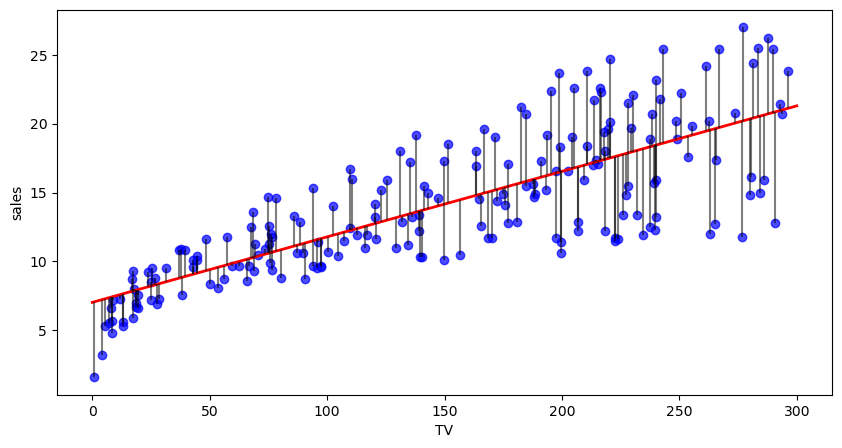

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
plt.plot(x, y, 'o', color='blue', alpha=0.7)
pts = np.linspace(0, 300, 2)
plt.plot(pts, b0 + b1 * pts, 'red', lw=2)
ax.set(xlabel='TV', ylabel='sales')
yhat = b0 + b1 * x # lub model.predict(advertising[['TV']])
ax.vlines(x, y, yhat, alpha=0.5, color='black');

Wykres konturowy funkcji RSS w przestrzeni parametrów $\beta_0$ i $\beta_1$:

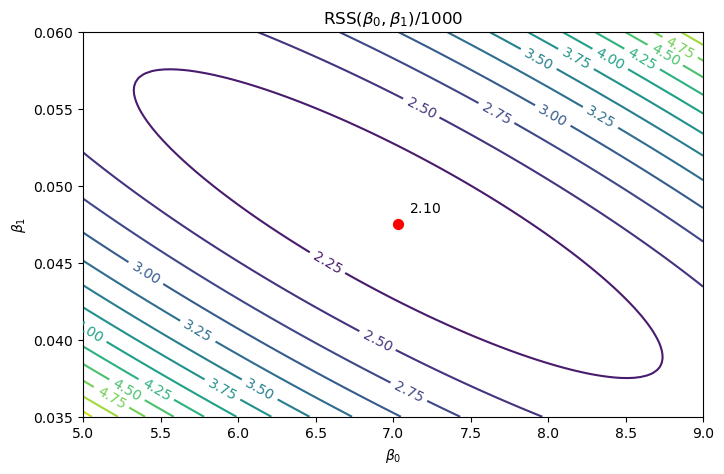

In [6]:
def rss(b0, b1, x=x, y=y):
    '''Zwraca wartość RSS dla danych parametrów b0, b1
    i danych treningowych x, y.'''
    return np.sum((y - (b0 + b1 * x))**2)

b0_vector = np.linspace(5, 9, 100)
b1_vector = np.linspace(0.035, 0.06, 100)

fig, ax = plt.subplots(figsize=(8, 5))
cs = ax.contour(b0_vector, b1_vector, [[rss(b0, b1, x=x, y=y) / 1000 for b0 in b0_vector] for b1 in b1_vector],
                 levels=15)
ax.clabel(cs, inline=True, fontsize=10)
ax.scatter([b0], [b1], c='red', s=50)
ax.annotate('${:.2f}$'.format(rss(b0, b1, x=x, y=y)/1000), (b0, b1), xytext=(b0 + 0.07, b1 + 0.0007),
             fontsize=10)
ax.set(xlabel='$\\beta_0$', ylabel='$\\beta_1$', title='$\\operatorname{RSS}(\\beta_0, \\beta_1)/1000$');

### 2.2. Ocena jakości oszacowania parametrów modelu

Niech

\begin{equation*}
Y=2+3X+\varepsilon,
\end{equation*}

gdzie $\varepsilon\sim \mathcal{N}(0, 0.1^2)$, będzie symulacją grającą rolę *prawdziwego* modelu. Zakładamy, że powyższe równanie jest liniowym modelem regresji *populacji* (czyli zbioru wszystkich możliwych obserwacji). Model ten nie jest znany, a to co obserwujemy to jedynie próba $(x_i, y_i)$, $i=1,\ldots,n$ wygenerowana z populacji. Mając daną próbę, możemy oszacować parametry modelu wyliczając $\hat{\beta}_0$ i $\hat{\beta}_1$, zgodnie z podanym wcześniej schematem. Widać, że wartości $\hat{\beta}_0$ i $\hat{\beta}_1$ są zmiennymi losowymi, gdyż zależą od próby. W szczególności, jeśli wylosujemy inną próbę, to otrzymamy inne wartości $\hat{\beta}_0$ i $\hat{\beta}_1$. Jak w takim razie ocenić jakość oszacowania parametrów modelu?

Oto przykład, w którym mamy $10$ prób losowych dla podanego modelu, po $n=100$ obserwacji w każdej próbie:

In [7]:
from numpy.random import RandomState

prng = RandomState(42)

def true_avg(x):
    return 2 + 3*x 

N = 10 # liczba prób
n = 100 # liczba obserwacji w próbie
sd = 6
a, b = -2, 2
xx = np.hstack([prng.uniform(a, b, n)[:, None] for _ in range(N)])
yy = np.hstack([true_avg(xx[:, [k]]) + prng.normal(0, sd, n)[:, None] for k in range(N)])

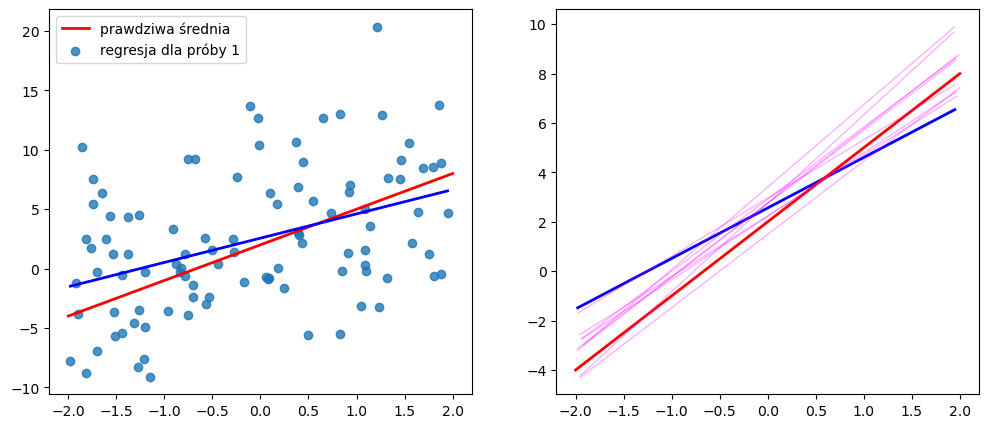

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
xpts = np.linspace(a, b, 100)
ypts = true_avg(xpts)
ax1.plot(xpts, ypts, 'red', lw=2, label='prawdziwa średnia')
sns.regplot(x=xx[:, 0], y=yy[:, 0], ax=ax1, ci=None, line_kws={'color': 'blue', 'lw': 2}, label='regresja dla próby 1')
sns.regplot(x=xx[:, 0], y=yy[:, 0], ax=ax2, ci=None, line_kws={'color': 'blue', 'lw': 2},
            scatter=False)
ax2.plot(xpts, ypts, 'red', lw=2)
for k in range(1, N):
    sns.regplot(x=xx[:, k], y=yy[:, k], ax=ax2, ci=None,
                line_kws={'color': 'magenta', 'lw': 1, 'alpha': 0.3},
                scatter=False)
ax1.legend();

#### Niepewność parametrów modelu 

Wartości $\hat{\beta}_0$, $\hat{\beta}_1$ zależą od próby; można jednak pokazać, że gdyby wziąć ich wartości średnie z wielu prób, to otrzymalibyśmy wartości bliskie, a przy bardzo wielu próbach nawet równe, wartościom prawdziwym.
Właśność tę można zapisać bardziej formalnie jako:

\begin{equation*}
\mathbb{E}_{\mathcal{D}}(\hat{\beta}_0) = \beta_0,\qquad \mathbb{E}_{\mathcal{D}}(\hat{\beta}_1) = \beta_1,
\end{equation*}

gdzie $\mathcal{D}$ oznacza rozkład próby danych treningowych.
Mówimy, że estymatory $\hat{\beta}_0$ i $\hat{\beta}_1$ są *nieobciążone* (*unbiased*). 

Jak dużego rozrzutu wartości $\hat{\beta}_0$, $\hat{\beta}_1$ możemy się spodziewać? Tę informację przechowuje ich *błąd standardowy* (*standard error*):


<div class="wzor">

\begin{equation*}
\text{SE}(\hat{\beta}_0)^2 = \sigma^2\left[\frac{1}{n} + \frac{\bar{x}^2}{\sum_{i=1}^n (x_i - \bar{x})^2}\right],\qquad
\text{SE}(\hat{\beta}_1)^2 = \frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x})^2},
\end{equation*}

</div>

gdzie $\sigma^2 = \text{Var}(\varepsilon)$ jest wariancją błędu losowego $\varepsilon$. Zakładamy, że wszystkie błędy $\varepsilon_i$ mają tę samą wariancję $\sigma^2$ oraz, że są niezależne od siebie.

W praktyce wartość $\sigma^2$ jest nieznana, gdyż jest to wariancja pochodząca z populacji a my do dyspozycji mamy jedynie próbę. Do oszacowania $\sigma^2$ na podstawie próbki stosuje się estymator:

<div class="wzor">

\begin{equation*}
\text{RSE}=\hat{\sigma} = \sqrt{\frac{\text{RSS}}{n-2}}= \sqrt{\frac{1}{n-2}\sum_{i=1}^n e_i^2}.
\end{equation*}
</div>

$\text{RSE}$ nazywamy *resztowym błędem standardowym* (*residual standard error*). 

Błędy standardowe umożliwiają nam wyznaczenie *przedziałów ufności* (*confidence intervals*) o współczynniku ufności 95% dla parametrów $\beta_0$ i $\beta_1$:

\begin{equation*}
\left[ \hat{\beta}_0 - 2\cdot \text{SE}(\hat{\beta}_0),\ \hat{\beta}_0 + 2\cdot \text{SE}(\hat{\beta}_0) \right],\qquad
\left[ \hat{\beta}_1 - 2\cdot \text{SE}(\hat{\beta}_1),\ \hat{\beta}_1 + 2\cdot \text{SE}(\hat{\beta}_1) \right].
\end{equation*}

Przedziały te interpretujemy następująco: jeśli przeprowadzimy wiele eksperymentów, w których losujemy próby danych treningowych, to w 95% przypadków obliczone przedziały będą zawierały prawdziwą wartość parametru $\beta_0$, odpowiednio $\beta_1$.

Podane niżej wyliczenia pokazują, że w przypadku regresji `sales` względem `TV` mamy:

\begin{equation*}
\text{SE}(\widehat{\text{const}}) = 0.4578,\qquad \text{SE}(\widehat{\text{TV}}) = 0.0027,
\end{equation*}

a 95% przedziały ufności dla $\text{const}$ i $\text{TV}$ wynoszą odpowiednio:

\begin{equation*}
\left[ 6.1297,\ 7.9355 \right],\qquad
\left[ 0.0422,\ 0.0528 \right].
\end{equation*}

In [9]:
from statsmodels.api import OLS, add_constant

model = OLS(advertising['sales'], add_constant(advertising[['TV']]))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 09 Oct 2025   Prob (F-statistic):           1.47e-42
Time:                        10:43:26   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Test zależności zmiennej celu od zmiennej objaśniającej

Korzystając z błędów standardowych, możemy przeprowadzić **testy istotności statystycznej** (*hypothesis tests*) dotyczące parametrów $\beta_0$ i $\beta_1$.
W szczególności interesuje nas, czy istnieje związek między zmienną niezależną $X$ a zmienną zależną $Y$.
W tym celu testujemy hipotezę zerową:

\begin{equation*}
H_0: \beta_1 = 0 \quad \text{(brak relacji między $X$ a $Y$)}
\end{equation*}

przeciwko hipotezie alternatywnej:

\begin{equation*}
H_1: \beta_1 \neq 0 \quad \text{(istnieje relacja między $X$ a $Y$)}.
\end{equation*}

Jeśli $H_0$ jest prawdziwa, to $Y = \beta_0 + \varepsilon$, a więc $Y$ nie zależy od $X$.

Aby zweryfikować $H_0$, korzystamy z tzw. **statystyki t** (*t-statistic*):

\begin{equation*}
t = \frac{\hat{\beta}_1 - 0}{\text{SE}(\hat{\beta}_1)}.
\end{equation*}

Niech $t_{\text{score}}$ oznacza wartość statystyki $t$ wyliczoną dla danych treningowych.
Wartość $t_{\text{score}}$ pokazuje, jak bardzo oszacowanie $\hat{\beta}_1$ jest oddalone od zera — wyrażone w jednostkach błędu standardowego $\text{SE}(\hat{\beta}_1)$.


#### 2.2.1. $p$-wartość testu (*p-value*)

W rozważanej sytuacji $p$-wartość to prawdopodobieństwo, że statystyka $t$ przyjmie wartość co najmniej tak ekstremalną jak zaobserwowana, **pod warunkiem, że hipoteza zerowa jest prawdziwa**:

\begin{equation*}
p = P(|t| > |t_{\text{score}}| \mid H_0).
\end{equation*}

Innymi słowy, pytamy: *jak mało prawdopodobne byłoby uzyskanie tak dużej (lub większej) odległości $\hat{\beta}_1$ od zera, gdyby w rzeczywistości $\beta_1 = 0$.*
Jeśli $p$-wartość jest mała, to wynik obserwowany byłby bardzo nietypowy przy prawdziwości $H_0$, więc **hipotezę zerową odrzucamy**.
W przeciwnym razie **nie mamy podstaw do jej odrzucenia**.
Typowe progi istotności to $p=0.05$ (5%) lub $p=0.01$ (1%).

#### 2.2.2. Rozkład statystyki $t$

Jeśli hipoteza zerowa jest prawdziwa, to statystyka $t$ ma **rozkład t-Studenta** z $n-2$ stopniami swobody.
Dla prób o rozmiarze $n > 30$ rozkład ten jest bardzo zbliżony do standardowego rozkładu normalnego.
Zatem:

\begin{equation*}
P(|t| > |t_{\text{score}}| \mid H_0) \approx P(|Z| > |t_{\text{score}}|),
\quad \text{gdzie } Z \sim \mathcal{N}(0,1).
\end{equation*}

Wartości te można łatwo obliczyć przy użyciu dowolnego pakietu statystycznego.
Przykładowo:

\begin{equation*}
P(|Z| > 1.96) = 0.05, \qquad
P(|Z| > 2.58) = 0.01.
\end{equation*}

Oznacza to, że dla dużych $n$ próg odcięcia dla testu $t$ wynosi około **2** (dla poziomu 5%) oraz **2.6** (dla 1%).
Dla $30$ stopni swobody wartości te wynoszą odpowiednio $2.05$ i $2.75$.


W przypadku regresji `sales` względem `TV` mamy:

\begin{equation*}
t_{\text{score}} = 17.67,
\end{equation*}

co daje bardzo małą $p$-wartość. Oznacza to, że gdyby hipoteza zerowa była prawdziwa, to bylibyśmy świadkami bardzo mało prawdopodobnego zdarzenia. Zatem odrzucamy hipotezę zerową i przyjmujemy hipotezę alternatywną, że istnieje silna statystycznie istotna relacja między nakładami reklamowymi w telewizji a wynikami sprzedaży.

### 2.3. Ocena dokładności modelu

Zwykle oceny stopnia dopasowania modelu do danych dokonujemy na podstawie wartości resztowego błędu standardowego $\text{RSE}$ i współczynnika determinacji $R^2$. Dla regresji `sales` względem `TV` resztowy błąd standardowy $\text{RSE}$ wynosi:

In [10]:
b0, b1 = model.params.values
np.sqrt(np.sum((advertising['sales'] - (b0 + b1 * advertising['TV']))**2) / (len(advertising) - 2))

np.float64(3.258656368650462)

lub, wykorzystując obiekt `model`:

In [11]:
np.sqrt(model.mse_resid)

np.float64(3.258656368650463)

Wartość $\text{RSE}=3.26$ oznacza, że średni błąd predykcji modelu wynosi 3.26 jednostek produktu. Wartość ta jest wyrażona w tych samych jednostkach co zmienna zależna $Y$. W przypadku regresji `sales` względem `TV` średnia wartość sprzedaży wynosi $\overline{\text{sales}}=14.02$, zatem średni błąd predykcji modelu stanowi około 23% średniej wartości sprzedaży.

#### 2.3.1. Statystyka $R^2$

Statystykę $R^2$ definiujemy wzorem:

<div class="wzor">

\begin{equation*}
R^2 = \frac{\text{TSS} - \text{RSS}}{\text{TSS}} = 1 - \frac{\text{RSS}}{\text{TSS}},
\end{equation*}
</div>

gdzie $\text{TSS} = \sum_{i=1}^n (y_i - \bar{y})^2$ jest całkowitą sumą kwadratów (*total sum of squares*). Statystyka $\text{TSS}$ stanowi całkowitą wariancję $Y$, bez uwzględniania zależności $Y$ od $X$. Z kolei $\text{RSS}$ jest średnią wariancją $Y-(\hat{\beta}_0 + \hat{\beta}_1 X)$, czyli już po uwzględnieniu zależności $Y$ od $X$. Inaczej mówiąc, jest to wariancja, która pozostaje w danych po zastosowaniu modelu, czyli taka, której model nie jest w stanie wyjaśnić.
Wynika stąd, że 
1. $\text{RSS}\leqslant\text{TSS}$, gdyż model usuwa (a przynajmniej powinien usuwać) część wariancji $Y$;
2. ponadto, $\text{TSS}-\text{RSS}$ jest, przez dopełnienie, ilością wariancji $Y$, którą model zdołał wyjaśnić.

Podsumowując, $R^2$ jest proporcją tej wariancji $Y$, która została wyjaśniona przez model, do całkowitej wariancji $Y$. 

* Wartość $R^2=1$ oznacza, że model wyjaśnia całą wariancję $Y$. 
* Wartość $R^2=0$ oznacza, że model nie wyjaśnia żadnej wariancji $Y$ ponad to, co wyjaśnia model średniej arytmetycznej $\bar{y}$.
* Wartość $R^2<0$ oznacza, że model jest gorszy niż model średniej arytmetycznej $\bar{y}$. W praktyce ta sytuacja nie powinna mieć miejsca.

Z podanego wyżej wywołania `model.summary()` wynika, że $R^2=0.612$ w modelu regresji `sales` względem `TV`. Oznacza to, że model wyjaśnia około 61% wariancji sprzedaży. Pozostałe 39% wariancji interpretujemy jako wariancję błędu losowego $\varepsilon$.

Próbkowy współczynnik korelacji definiujemy wzorem: 

\begin{equation*}
r = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^n (x_i - \bar{x})^2}\sqrt{\sum_{i=1}^n (y_i - \bar{y})^2}}.
\end{equation*}

Można pokazać, że w przypadku regresji liniowej z jedną zmienną niezależną $X$ i jedną zmienną zależną $Y$ kwadrat współczynnika korelacji jest równy współczynnikowi determinacji: $r^2=R^2$. 

W przypadku regresji `sales` względem `TV` mamy:

In [12]:
x, y = advertising['TV'], advertising['sales']
xbar, ybar = x.mean(), y.mean() 
(np.sum((x - xbar) * (y - ybar)) / np.sqrt((np.sum((x - xbar)**2) * np.sum((y - ybar)**2))))**2

np.float64(0.6118750508500709)

albo wykorzystując próbkową macierz kowariancji:

In [13]:
cov = np.cov(x, y)
(cov[0, 1] / np.sqrt(cov[0, 0] * cov[1, 1]))**2

np.float64(0.6118750508500707)